In [1]:
# import needed packages
import numpy as np
from model_code import utilities_visuals as ut
from model_code import utilities_simulation as us
from model_code import ArgModel as normal_am
from model_code import reducedArgModel as reduced_am

In [2]:
M = 4
# defines the parameters needed to run the model
model_parameters = {
    "no_of_agents": 100
    , "no_of_iterations": 10000
    # strength of biased processing
    , "ß": 3.2
    # number of implicitly modelled arguments
    , "M": M
    # linkage matrix
    , "C": us.create_connection_matrix_symmetrical(no_of_arguments=M, normalised=True)
}

SPA_param = {
    'params_to_iter': np.array(['ß']),
    'sims_per_comb': 60,
    'boundaries': np.array([[2,5]]),
    'no_of_steps': np.array([31])
}

In [11]:
measures = {
    "time_until_consens": model_parameters["no_of_iterations"],
    #, "mean_attitude_END_VALUE": 0
    "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
}


measures_from_SPA_normal = normal_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)

ut.pickle_sim(measures_from_SPA_normal, SPA_param)
#%store measures_from_SPA_normal

[2.]
[2.1]
[2.2]
[2.3]
[2.4]
[2.5]
[2.6]
[2.7]
[2.8]
[2.9]
[3.]
[3.1]
[3.2]
[3.3]
[3.4]
[3.5]
[3.6]
[3.7]
[3.8]
[3.9]
[4.]
[4.1]
[4.2]
[4.3]
[4.4]
[4.5]
[4.6]
[4.7]
[4.8]
[4.9]
[5.]
NormalModel_N1000_M4_T10000_S60_ß25.p


NormalModel_N100_M4_T10000_S60_ß25.p


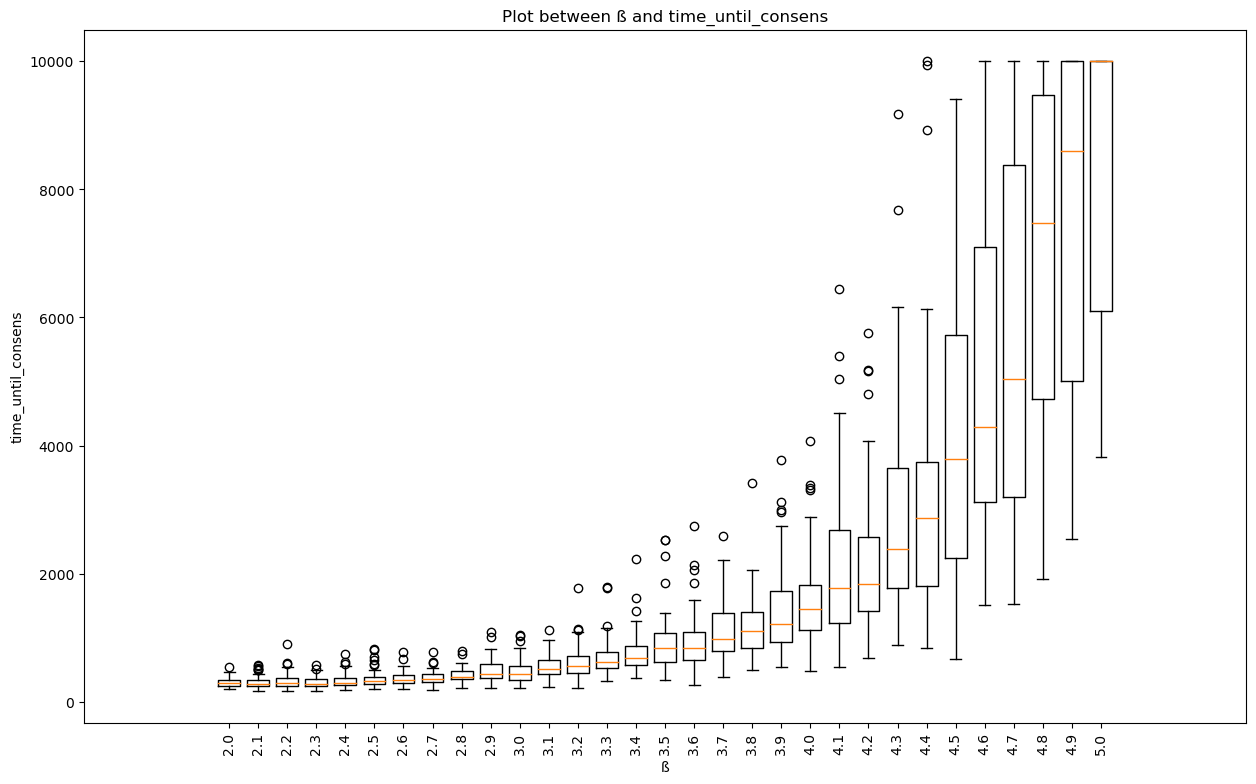

In [3]:
measures_from_SPA_normal = ut.load_sim(model_parameters, SPA_param, "NormalModel")
#%store -r measures_from_SPA_normal
ut.xy_plot_measurement_boxplot('ß', 'time_until_consens', measures_from_SPA_normal)

In [3]:
measures = {
    "time_until_consens": model_parameters["no_of_iterations"]
    #, "mean_attitude_END_VALUE": 0
    #, "variance_attitude_END_VALUE": 0
    , "variance_attitude": np.zeros(model_parameters["no_of_iterations"])
}
measures_from_SPA_reduced = reduced_am.systematic_parameter_analysis(SPA_param, model_parameters, measures)

ut.pickle_sim(measures_from_SPA_reduced, SPA_param)

[2.]
[2.1]
[2.2]
[2.3]
[2.4]
[2.5]
[2.6]
[2.7]
[2.8]
[2.9]
[3.]
[3.1]
[3.2]
[3.3]
[3.4]
[3.5]
[3.6]
[3.7]
[3.8]
[3.9]
[4.]
[4.1]
[4.2]
[4.3]
[4.4]
[4.5]
[4.6]
[4.7]
[4.8]
[4.9]
[5.]
ReducedModel_N1000_M4_T10000_S60_ß25.p


ReducedModel_N100_M4_T10000_S60_ß25.p


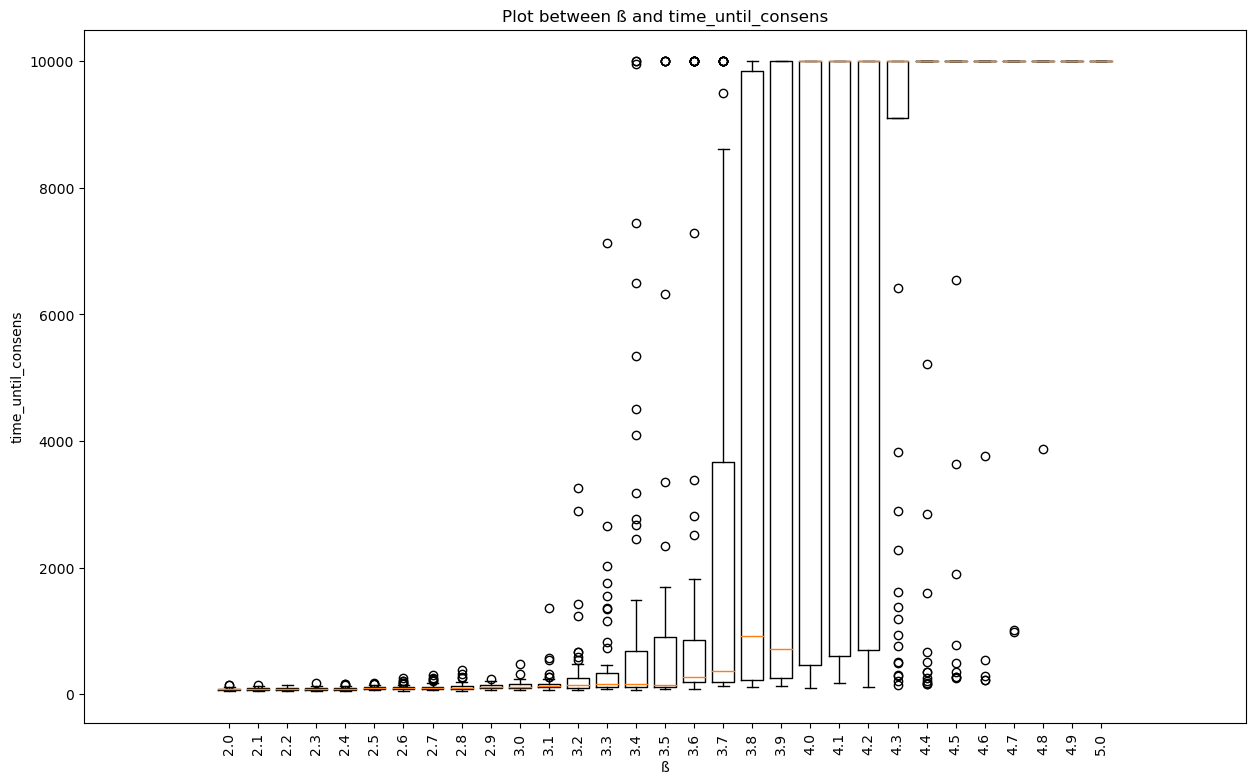

In [8]:
measures_from_SPA_reduced = ut.load_sim(model_parameters, SPA_param, "ReducedModel")
ut.xy_plot_measurement_boxplot('ß', 'time_until_consens', measures_from_SPA_reduced)

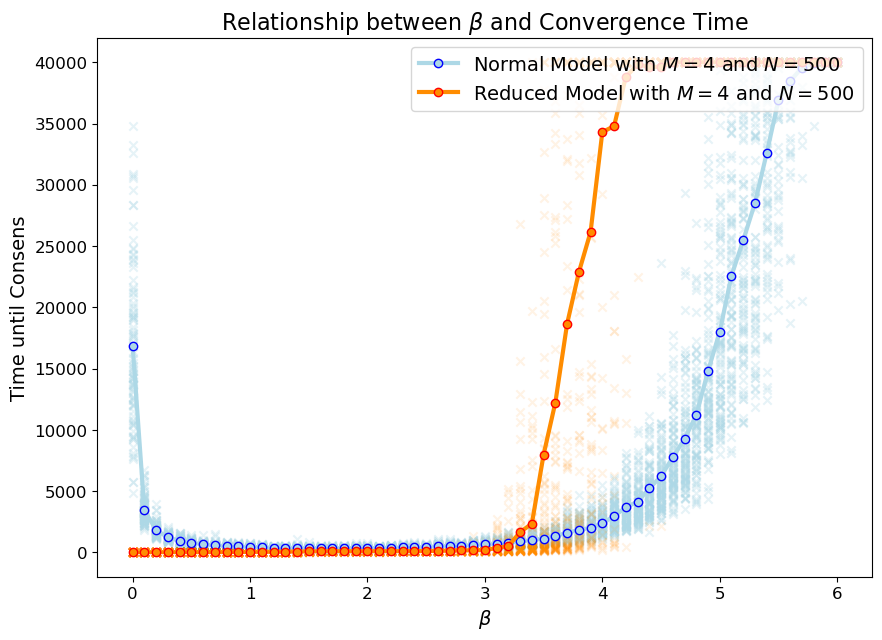

In [7]:
%store -r measures_from_SPA_reduced
%store -r measures_from_SPA_normal
from model_code import utilities_visuals as ut
ut.plot_beta_against_time_until_consens_two_sims(measures_from_SPA_normal, measures_from_SPA_reduced, 40000, "low_beta")

In [22]:
measures_from_SPA_normal = ut.load_sim(model_parameters, SPA_param, "NormalModel")
measures_from_SPA_reduced = ut.load_sim(model_parameters, SPA_param, "ReducedModel")

NormalModel_N100_M4_T10000_S60_ß25.p
ReducedModel_N100_M4_T10000_S60_ß25.p


In [27]:
variance_beta = ut.transform_SyPaAn_single_measure_single_dependency(measures_from_SPA_reduced, "variance_attitude", ["ß"], 1000)
# transform data into one vector containing all x values and one matrix containing in the column the y values for the respective x value
beta = np.unique(variance_beta[1])
variance = variance_beta[0].reshape(len(beta),int(len(variance_beta[0])/len(beta))).transpose()
consensus_rate = np.mean(np.where(variance<0.01, 1, 0), axis=0)
consensus_rate_with_beta = np.array([beta, consensus_rate])

In [28]:
consensus_rate_with_beta

array([[2.        , 2.1       , 2.2       , 2.3       , 2.4       ,
        2.5       , 2.6       , 2.7       , 2.8       , 2.9       ,
        3.        , 3.1       , 3.2       , 3.3       , 3.4       ,
        3.5       , 3.6       , 3.7       , 3.8       , 3.9       ,
        4.        , 4.1       , 4.2       , 4.3       , 4.4       ,
        4.5       , 4.6       , 4.7       , 4.8       , 4.9       ,
        5.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.98333333, 0.93333333, 0.86666667, 0.76666667,
        0.75      , 0.75      , 0.68333333, 0.51666667, 0.55      ,
        0.36666667, 0.35      , 0.26666667, 0.13333333, 0.15      ,
        0.1       , 0.06666667, 0.01666667, 0.        , 0.        ,
        0.        ]])

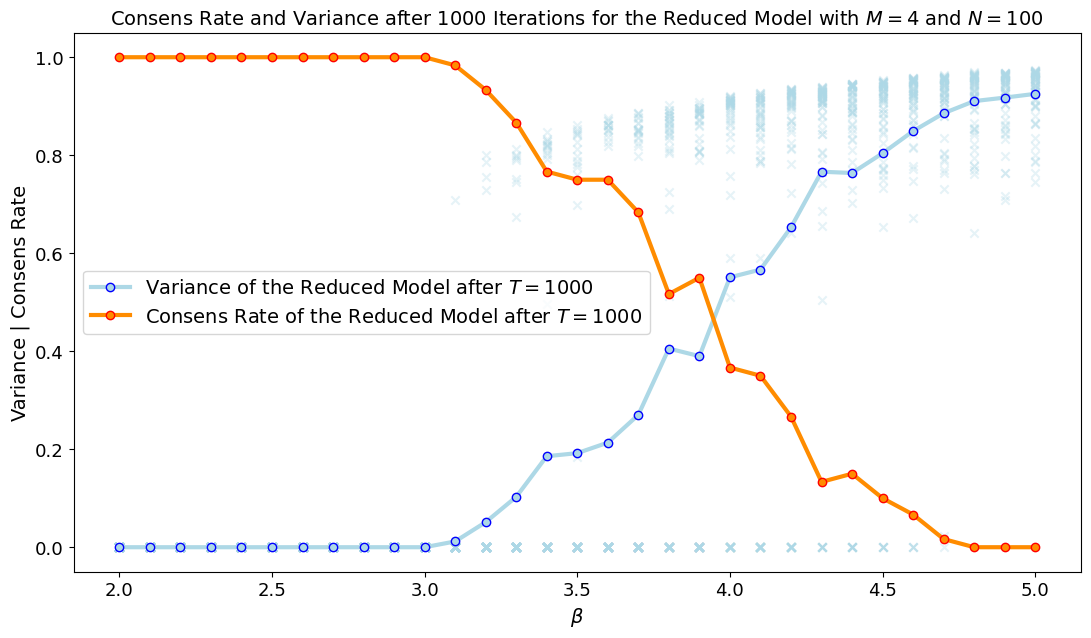

In [19]:
ut.variance_consensusrate_against_beta(measures_from_SPA_reduced, 1000)

In [6]:
ut.consensrate_withrespect_T_against_beta(measures_from_SPA_reduced, [1000, 2000, 4000, 8000, 16000, 32000])

AttributeError: module 'model_code.utilities_visuals' has no attribute 'consensrate_withrespect_T_against_beta'

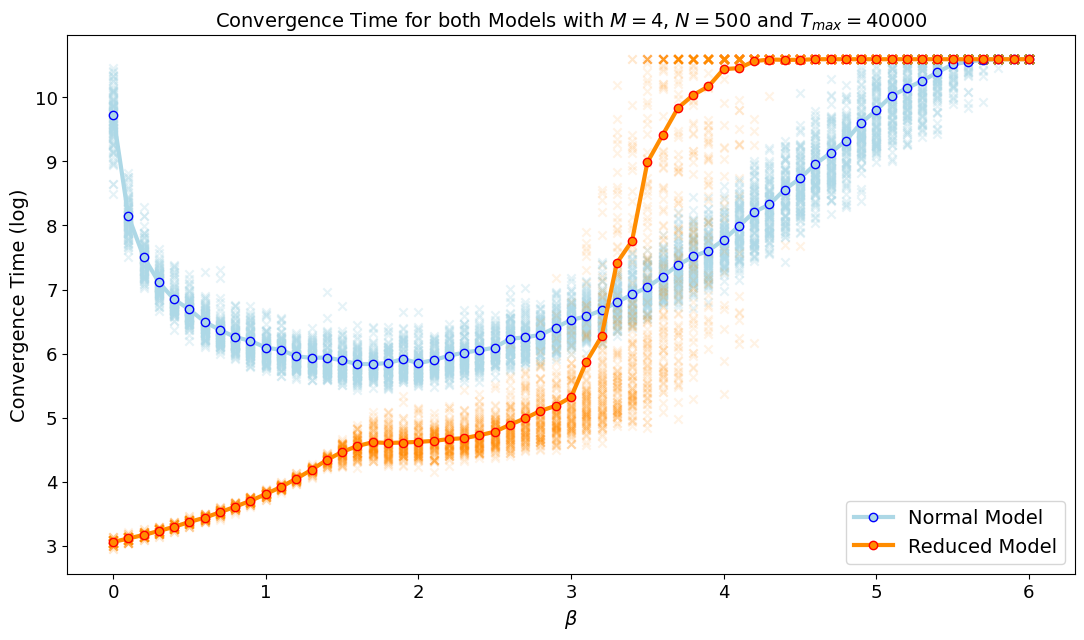

In [18]:
ut.convergence_time_against_beta(measures_from_SPA_normal, measures_from_SPA_reduced)

In [ ]:
measures_from_SPA_normal

In [ ]:
'measures_from_SPA_reduced_100agent = measures_from_SPA_reduced
%store measures_from_SPA_reduced_100agent

In [ ]:
measures_from_SPA_normal_100agent = measures_from_SPA_normal
%store measures_from_SPA_normal_100agent